In [133]:
%matplotlib inline

In [2]:
import os

import glob
import difflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx

from fuzzywuzzy import process, fuzz
from shapely.geometry import Point
from sklearn.linear_model import LogisticRegression

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('display.max_rows', None)

In [408]:
# happiness_data_2015= pd.read_csv("C:/Users/user/OneDrive/Documents/coding/Python/Data Science/Regression Models/06. Regression-Models-Lab/happiness 2022/2015.csv")
# happiness_data_2016= pd.read_csv("C:/Users/user/OneDrive/Documents/coding/Python/Data Science/Regression Models/06. Regression-Models-Lab/happiness 2022/2016.csv")
# happiness_data_2017= pd.read_csv("C:/Users/user/OneDrive/Documents/coding/Python/Data Science/Regression Models/06. Regression-Models-Lab/happiness 2022/2017.csv")
# happiness_data_2018= pd.read_csv("C:/Users/user/OneDrive/Documents/coding/Python/Data Science/Regression Models/06. Regression-Models-Lab/happiness 2022/2018.csv")
# happiness_data_2019= pd.read_csv("C:/Users/user/OneDrive/Documents/coding/Python/Data Science/Regression Models/06. Regression-Models-Lab/happiness 2022/2019.csv")
# happiness_data_2020= pd.read_csv("C:/Users/user/OneDrive/Documents/coding/Python/Data Science/Regression Models/06. Regression-Models-Lab/happiness 2022/2020.csv")
# happiness_data_2021= pd.read_csv("C:/Users/user/OneDrive/Documents/coding/Python/Data Science/Regression Models/06. Regression-Models-Lab/happiness 2022/2021.csv")
# happiness_data_2022= pd.read_csv("C:/Users/user/OneDrive/Documents/coding/Python/Data Science/Regression Models/06. Regression-Models-Lab/happiness 2022/2022.csv")
# print("2015", happiness_data_2015.columns)
# print("2016", happiness_data_2016.columns)
# print("2017", happiness_data_2017.columns)
# print("2018", happiness_data_2018.columns)
# print("2019", happiness_data_2019.columns)
# print("2020", happiness_data_2020.columns)
# print("2021", happiness_data_2021.columns)
# # print("2022", happiness_data_2022.columns)
# happiness_data_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
# column_mappings = {
#     2015: ['Country', 'Happiness Score'],
#     2016: ['Country', 'Happiness Score'],
#     2017: ['Country', 'Happiness.Score'],
#     2018: ['Country or region', 'GDP per capita'],
#     2019: ['Country or region', 'GDP per capita'],
#     2020: ['Country name', 'Explained by: Log GDP per capita'],
#     2021: ['Country name', 'Explained by: Log GDP per capita'],
#     2022: ['Country', 'Explained by: GDP per capita']
#     } 

# # years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [6]:
# List of the unique countries/countries of interest based on the Happiness datafiles

unique_countries = [
"Afghanistan","Albania","Algeria","Argentina","Armenia","Australia","Austria","Azerbaijan","Bahrain","Bangladesh","Belarus","Belgium","Benin","Bolivia","Bosnia and Herzegovina","Botswana","Brazil","Bulgaria","Burkina Faso","Cambodia","Cameroon",
"Canada","Chad","Chile","China","Colombia","Congo","Costa Rica","Croatia","Cyprus","Czech","Denmark","Dominican Republic","Ecuador","Egypt","El Salvador","Estonia","United Kingdom","Ethiopia","Finland","France","Gabon",
"Georgia","Germany","Ghana","Greece","Guatemala","Guinea","Honduras","Hong Kong","Hungary","Iceland","India","Indonesia","Iran","Iraq","Ireland","Israel","Italy","Ivory Coast","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kosovo","Kuwait","Kyrgyzstan",
"Latvia","Lebanon","Liberia","Libya","Lithuania","Luxembourg","Macedonia","Madagascar","Malawi","Malaysia","Mali","Malta","Mauritania","Mauritius","Mexico","Moldova","Mongolia","Montenegro","Morocco","Myanmar","Namibia","Nepal","Netherlands",
"New Zealand","Nicaragua","Niger","Nigeria","Norway","Pakistan","Panama","Paraguay","Peru","Philippines","Poland","Portugal","Romania","Russia","Rwanda","Saudi Arabia","Senegal","Serbia","Sierra Leone",
"Singapore","Slovakia","Slovenia","South Africa","South Korea","Spain","Sri Lanka","Sweden","Switzerland","Taiwan","Tajikistan","Tanzania","Thailand","Togo","Tunisia","Turkey","Turkmenistan","Uganda","Ukraine",
"United Arab Emirates", "United Kingdom","United States","Uruguay","Uzbekistan","Venezuela","Vietnam","Yemen","Zambia","Zimbabwe"]
unique_countries_df =pd.DataFrame({'Unique_Countries': unique_countries})
# unique_countries_df

In [7]:
### Dictionary used to merge the 2015 - 2022 Happiness Score dfs  

fuzzy_dict_ref = {
 'Afghanistan': ['Afghanistan'],
 'Albania': ['Albania'],
 'Algeria': ['Algeria'],
 'Argentina': ['Argentina'],
 'Armenia': ['Armenia'],
 'Australia': ['Australia'],
 'Austria': ['Austria'],
 'Azerbaijan': ['Azerbaijan', 'Azerbaijan*'],
 'Bahrain': ['Bahrain'],
 'Bangladesh': ['Bangladesh'],
 'Belarus': ['Belarus*', 'Belarus'],
 'Belgium': ['Belgium'],
 'Benin': ['Benin'],
 'Bolivia': ['Bolivia'],
 'Bosnia and Herzegovina': ['Bosnia and Herzegovina'],
 'Botswana': ['Botswana*', 'Botswana'],
 'Brazil': ['Brazil'],
 'Bulgaria': ['Bulgaria'],
 'Burkina Faso': ['Burkina Faso'],
 'Cambodia': ['Cambodia'],
 'Cameroon': ['Cameroon'],
 'Canada': ['Canada'],
 'Chad': ['Chad*', 'Chad'],
 'Chile': ['Chile'],
 'China': ['China'],
 'Colombia': ['Colombia'],
 'Congo': ['Congo', 'Congo (Brazzaville)', 'Congo (Kinshasa)'],
 'Costa Rica': ['Costa Rica'],
 'Croatia': ['Croatia'],
 'Cyprus': ['Cyprus', 'Northern Cyprus', 'North Cyprus*', 'North Cyprus'],
 'Czech': ['Czech Republic', 'Czechia'],
 'Denmark': ['Denmark'],
 'Dominican Republic': ['Dominican Republic'],
 'Ecuador': ['Ecuador'],
 'Egypt': ['Egypt'],
 'El Salvador': ['El Salvador'],
 'Estonia': ['Estonia'],
 'United Kingdom': ['United Kingdom'],
 'Ethiopia': ['Ethiopia'],
 'Finland': ['Finland'],
 'France': ['France'],
 'Gabon': ['Gabon'],
 'Georgia': ['Georgia'],
 'Germany': ['Germany'],
 'Ghana': ['Ghana'],
 'Greece': ['Greece'],
 'Guatemala': ['Guatemala*', 'Guatemala'],
 'Guinea': ['Guinea'],
 'Honduras': ['Honduras'],
 'Hong Kong S.A': ['Hong Kong', 'Hong Kong S.A.R. of China', 'Hong Kong S.A.R., China'],
 'Hungary': ['Hungary'],
 'Iceland': ['Iceland'],
 'India': ['India'],
 'Indonesia': ['Indonesia'],
 'Iran': ['Iran'],
 'Iraq': ['Iraq'],
 'Ireland': ['Ireland'],
 'Israel': ['Israel'],
 'Italy': ['Italy'],
 'Ivory Coast': ['Ivory Coast'],
 'Jamaica': ['Jamaica'],
 'Japan': ['Japan'],
 'Jordan': ['Jordan'],
 'Kazakhstan': ['Kazakhstan'],
 'Kenya': ['Kenya'],
 'Kosovo': ['Kosovo'],
 'Kuwait': ['Kuwait*', 'Kuwait'],
 'Kyrgyzstan': ['Kyrgyzstan'],
 'Latvia': ['Latvia'],
 'Lebanon': ['Lebanon'],
 'Liberia': ['Liberia', 'Liberia*'],
 'Libya': ['Libya', 'Libya*'],
 'Lithuania': ['Lithuania'],
 'Luxembourg': ['Luxembourg', 'Luxembourg*'],
 'Macedonia': ['Macedonia', 'North Macedonia'],
 'Madagascar': ['Madagascar*', 'Madagascar'],
 'Malawi': ['Malawi'],
 'Malaysia': ['Malaysia'],
 'Mali': ['Mali'],
 'Malta': ['Malta'],
 'Mauritania': ['Mauritania', 'Mauritania*'],
 'Mauritius': ['Mauritius'],
 'Mexico': ['Mexico'],
 'Moldova': ['Moldova'],
 'Mongolia': ['Mongolia'],
 'Montenegro': ['Montenegro'],
 'Morocco': ['Morocco'],
 'Myanmar': ['Myanmar'],
 'Namibia': ['Namibia'],
 'Nepal': ['Nepal'],
 'Netherlands': ['Netherlands'],
 'New Zealand': ['New Zealand'],
 'Nicaragua': ['Nicaragua'],
 'Niger': ['Niger*', 'Niger'],
 'Nigeria': ['Nigeria'],
 'Norway': ['Norway'],
 'Pakistan': ['Pakistan'],
 'Panama': ['Panama'],
 'Paraguay': ['Paraguay'],
 'Peru': ['Peru'],
 'Philippines': ['Philippines'],
 'Poland': ['Poland'],
 'Portugal': ['Portugal'],
 'Romania': ['Romania'],
 'Russia': ['Russia'],
 'Rwanda': ['Rwanda*', 'Rwanda'],
 'Saudi Arabia': ['Saudi Arabia'],
 'Senegal': ['Senegal'],
 'Serbia': ['Serbia'],
 'Sierra Leone': ['Sierra Leone'],
 'Singapore': ['Singapore'],
 'Slovakia': ['Slovakia'],
 'Slovenia': ['Slovenia'],
 'South Africa': ['South Africa'],
 'South Korea': ['South Korea'],
 'Spain': ['Spain'],
 'Sri Lanka': ['Sri Lanka'],
 'Sweden': ['Sweden'],
 'Switzerland': ['Switzerland'],
 'Taiwan': ['Taiwan', 'Taiwan Province of China'],
 'Tajikistan': ['Tajikistan'],
 'Tanzania': ['Tanzania'],
 'Thailand': ['Thailand'],
 'Togo': ['Togo'],
 'Tunisia': ['Tunisia'],
 'Turkey': ['Turkey'],
 'Turkmenistan': ['Turkmenistan', 'Turkmenistan*'],
 'Uganda': ['Uganda'],
 'Ukraine': ['Ukraine'],
 'United Arab Emirates': ['United Arab Emirates'],
 'United States': ['United States'],
 'Uruguay': ['Uruguay'],
 'Uzbekistan': ['Uzbekistan'],
 'Venezuela': ['Venezuela'],
 'Vietnam': ['Vietnam'],
 'Yemen': ['Yemen*', 'Yemen'],
 'Zambia': ['Zambia'],
 'Zimbabwe': ['Zimbabwe']
}

In [8]:
##Function to import all files into one df dictionary

def import_all_dfs(years, path):
    
    dfs_dict = {}
    
    for year in years:
        file_name = f"{year}.csv"
        file_path = os.path.join(path, file_name)
        
        if os.path.exists(file_path):
            dfs_dict[year] = pd.read_csv(file_path)
        else:
            print(f"No file found for year {year}")
    
    return dfs_dict

In [9]:
##Function to rename & retain columns the df in dictionary

def rename_and_retain_cols_for_all_dfs(dfs_dict):

    for year in dfs_dict.keys():
        dfs_dict[year] = rename_columns_for_year(dfs_dict[year], year)
    return dfs_dict

In [10]:
##Function to rename & retain columns of interest the df dictionary

def rename_columns_for_year(df, year):

    if 'Country or region' in df.columns:
        df.rename(columns={
            'Country or region': 'Country', 
            'Score': f"Score_{year}",
            'GDP per capita': f"GDP_PC_{year}", 
            'Perceptions of corruption': f"Corruption_{year}"
        }, inplace=True)
            
    elif 'Country' in df.columns:
        if year == 2022:
            df.rename(columns={
                'Happiness score': f"Score_{year}",
                'Explained by: GDP per capita': f"GDP_PC_{year}",
                'Explained by: Perceptions of corruption': f"Corruption_{year}"
            }, inplace=True)
        elif year in [2016, 2015]:
            df.rename(columns={
                'Happiness Score': f"Score_{year}", # Adjusted this line
                'Economy (GDP per Capita)': f"GDP_PC_{year}",
                'Trust (Government Corruption)': f"Corruption_{year}"
            }, inplace=True)
        else:
            df.rename(columns={
                'Happiness.Score': f"Score_{year}",
                'Economy..GDP.per.Capita.': f"GDP_PC_{year}",
                'Trust..Government.Corruption.': f"Corruption_{year}"
            }, inplace=True)
                
    elif 'Country name' in df.columns:
        df.rename(columns={
            'Country name': 'Country', 
            'Ladder score': f"Score_{year}",
            'Explained by: Log GDP per capita': f"GDP_PC_{year}",
            'Explained by: Perceptions of corruption': f"Corruption_{year}"
        }, inplace=True)
    
    required_cols = ['Country', f"Score_{year}", f"GDP_PC_{year}", f"Corruption_{year}"]
    
    for col in df.columns:
        if col not in required_cols:
            df.drop(col, axis=1, inplace=True)

    return df

In [35]:
## Matching fuzzy country matches from the unique countries list to the countries in the countries features for all df

def add_fuzzy_matches_key_column(df, fuzzy_dict_ref):

    df['fuzzy_matches_key'] = np.nan
    
    for key, values in fuzzy_dict_ref.items():
        for value in values:
            df.loc[df['Country'] == value, 'fuzzy_matches_key'] = key
    
    return df

def update_all_dfs_with_fuzzy_matches_key(dfs_dict, fuzzy_dict_ref):
    
    for year, df in dfs_dict.items():
        df = add_fuzzy_matches_key_column(df, fuzzy_dict_ref)
        dfs_dict[year] = df
        
    return dfs_dict

In [36]:
## Cleaning wrong formatting in columns of interest

def convert_to_float(df):
    
    for column in df.columns:
        if column not in ['Country', 'fuzzy_matches_key']:
            df[column] = df[column].str.replace(',', '.').astype(float)
            
    return df

In [37]:
## Removing the observations with missing values

def drop_na_rows(dfs_dict):
    
    for year, df in dfs_dict.items():
        dfs_dict[year] = df.dropna(subset=['fuzzy_matches_key'])
        
    return dfs_dict

In [38]:
## locating duplicates within the all df dict 

def identify_duplicate_rows(dfs_dict):
    duplicates_dict = {}
    
    for year, df in dfs_dict.items():
        duplicates = df[df['fuzzy_matches_key'].duplicated(keep=False)]
        if not duplicates.empty:
            duplicates_dict[year] = duplicates
            
    return duplicates_dict

In [49]:
## For the found duplicated rows average between the 2 rows is calculated and then duplicated observations are dropped and replaced with the calculated averages

def average_and_remove_duplicates(dfs_dict):
    updated_dfs = {}
    
    for year, df in dfs_dict.items():
        while df['fuzzy_matches_key'].duplicated().any():

            duplicated_keys = df[df['fuzzy_matches_key'].duplicated(keep=False)]['fuzzy_matches_key'].unique()
            
            for key in duplicated_keys:
                dup_rows = df[df['fuzzy_matches_key'] == key]
                mean_values = dup_rows[['Score_' + str(year), 'GDP_PC_' + str(year), 'Corruption_' + str(year)]].mean()
                mean_values['Country'] = dup_rows['Country'].iloc[0]
                mean_values['fuzzy_matches_key'] = key
                df = df[df['fuzzy_matches_key'] != key]
                df = pd.concat([df, pd.DataFrame([mean_values])], ignore_index=True)
            
        updated_dfs[year] = df

    return updated_dfs

In [50]:
## Ranking of countries based on score

def rank_countries(dfs_dict):
    
    for year, df in dfs_dict.items():
        df[f'rank_{year}'] = df[f'Score_{year}'].rank(ascending=False).astype(int)
        
    return dfs_dict

In [64]:
## Merge all df from the dictionary on the unique countries list into one df

def merge_all_dfs(dfs_dict):
    merged_df = dfs_dict[list(dfs_dict.keys())[0]]
    
    for year, df in list(dfs_dict.items())[1:]:
        if 'Country' in df.columns:
            df = df.rename(columns={'Country': f'Country_{year}'})
        merged_df = merged_df.merge(df, on='fuzzy_matches_key', how='outer')
        
    return merged_df

In [71]:
## Renaming the new countries column

def clean_merged_df(merged_df):

    columns_to_keep = [col for col in merged_df.columns if not col.startswith('Country')]
    cleaned_df = merged_df[columns_to_keep]
    cleaned_df = cleaned_df.rename(columns={'fuzzy_matches_key': 'unique countries'})
    
    return cleaned_df

In [77]:
## Filling missing values for Namibia with average of the next 2 years 

def fill_missing_values_2015(df):

    df_filled = df.copy()
    
    mask = df_filled[['Score_2015', 'GDP_PC_2015', 'Corruption_2015']].isnull().all(axis=1)
    indices_with_nan = df_filled[mask].index

    for index in indices_with_nan:
        df_filled.loc[index, 'Score_2015'] = np.mean([df_filled.loc[index, 'Score_2016'], df_filled.loc[index, 'Score_2017']])
        df_filled.loc[index, 'GDP_PC_2015'] = np.mean([df_filled.loc[index, 'GDP_PC_2016'], df_filled.loc[index, 'GDP_PC_2017']])
        df_filled.loc[index, 'Corruption_2015'] = np.mean([df_filled.loc[index, 'Corruption_2016'], df_filled.loc[index, 'Corruption_2017']])
    
    return df_filled

In [54]:
## Reranking after filling the missing values

def rerank_2015_countries(df_filled):
    
    df_filled['rank_2015'] = df_filled['Score_2015'].rank(ascending=False).astype(int)
    
    return df_filled

In [80]:
## Filling missing values for Corruption

def fill_missing_values_other(df_filled):
    
    mask = df_filled.isnull().any(axis=1)
    df_filled.loc[mask] = df_filled.loc[mask].fillna(0)
    
    return df_filled

In [82]:
## Ratio between score and GDP weight/ GDP as proportion of the score

def GDP_per_score(df_filled):
    years = range(2015, 2023)
    new_cols = ['unique countries']
    
    for year in years:
        score_col = f'Score_{year}'
        gdp_col = f'GDP_PC_{year}'
        ratio_col = f'GDP_to_Score_{year}'
        
        df_filled[ratio_col] = df_filled[gdp_col]/df_filled[score_col]
        df_filled.replace([np.inf, -np.inf], np.nan, inplace=True)
        new_cols.extend([score_col, gdp_col, f'Corruption_{year}', f'rank_{year}', ratio_col])
        
    return df_filled[new_cols]

In [83]:
## Local folder where datafiles are stored
path = r'C:/Users/user/OneDrive/Documents/coding/Python/Data Science/Regression Models/06. Regression-Models-Lab/happiness 2022/'

## Years of interest
years = range(2015, 2023)

## Dict with the unique countries containing the name variants within the dataframes
fuzzy_dict_ref = {
 'Afghanistan': ['Afghanistan'],
 'Albania': ['Albania'],
 'Algeria': ['Algeria'],
 'Argentina': ['Argentina'],
 'Armenia': ['Armenia'],
 'Australia': ['Australia'],
 'Austria': ['Austria'],
 'Azerbaijan': ['Azerbaijan', 'Azerbaijan*'],
 'Bahrain': ['Bahrain'],
 'Bangladesh': ['Bangladesh'],
 'Belarus': ['Belarus*', 'Belarus'],
 'Belgium': ['Belgium'],
 'Benin': ['Benin'],
 'Bolivia': ['Bolivia'],
 'Bosnia and Herzegovina': ['Bosnia and Herzegovina'],
 'Botswana': ['Botswana*', 'Botswana'],
 'Brazil': ['Brazil'],
 'Bulgaria': ['Bulgaria'],
 'Burkina Faso': ['Burkina Faso'],
 'Cambodia': ['Cambodia'],
 'Cameroon': ['Cameroon'],
 'Canada': ['Canada'],
 'Chad': ['Chad*', 'Chad'],
 'Chile': ['Chile'],
 'China': ['China'],
 'Colombia': ['Colombia'],
 'Congo': ['Congo', 'Congo (Brazzaville)', 'Congo (Kinshasa)'],
 'Costa Rica': ['Costa Rica'],
 'Croatia': ['Croatia'],
 'Cyprus': ['Cyprus', 'Northern Cyprus', 'North Cyprus*', 'North Cyprus'],
 'Czech': ['Czech Republic', 'Czechia'],
 'Denmark': ['Denmark'],
 'Dominican Republic': ['Dominican Republic'],
 'Ecuador': ['Ecuador'],
 'Egypt': ['Egypt'],
 'El Salvador': ['El Salvador'],
 'Estonia': ['Estonia'],
 'United Kingdom': ['United Kingdom'],
 'Ethiopia': ['Ethiopia'],
 'Finland': ['Finland'],
 'France': ['France'],
 'Gabon': ['Gabon'],
 'Georgia': ['Georgia'],
 'Germany': ['Germany'],
 'Ghana': ['Ghana'],
 'Greece': ['Greece'],
 'Guatemala': ['Guatemala*', 'Guatemala'],
 'Guinea': ['Guinea'],
 'Honduras': ['Honduras'],
 'Hong Kong S.A': ['Hong Kong', 'Hong Kong S.A.R. of China', 'Hong Kong S.A.R., China'],
 'Hungary': ['Hungary'],
 'Iceland': ['Iceland'],
 'India': ['India'],
 'Indonesia': ['Indonesia'],
 'Iran': ['Iran'],
 'Iraq': ['Iraq'],
 'Ireland': ['Ireland'],
 'Israel': ['Israel'],
 'Italy': ['Italy'],
 'Ivory Coast': ['Ivory Coast'],
 'Jamaica': ['Jamaica'],
 'Japan': ['Japan'],
 'Jordan': ['Jordan'],
 'Kazakhstan': ['Kazakhstan'],
 'Kenya': ['Kenya'],
 'Kosovo': ['Kosovo'],
 'Kuwait': ['Kuwait*', 'Kuwait'],
 'Kyrgyzstan': ['Kyrgyzstan'],
 'Latvia': ['Latvia'],
 'Lebanon': ['Lebanon'],
 'Liberia': ['Liberia', 'Liberia*'],
 'Libya': ['Libya', 'Libya*'],
 'Lithuania': ['Lithuania'],
 'Luxembourg': ['Luxembourg', 'Luxembourg*'],
 'Macedonia': ['Macedonia', 'North Macedonia'],
 'Madagascar': ['Madagascar*', 'Madagascar'],
 'Malawi': ['Malawi'],
 'Malaysia': ['Malaysia'],
 'Mali': ['Mali'],
 'Malta': ['Malta'],
 'Mauritania': ['Mauritania', 'Mauritania*'],
 'Mauritius': ['Mauritius'],
 'Mexico': ['Mexico'],
 'Moldova': ['Moldova'],
 'Mongolia': ['Mongolia'],
 'Montenegro': ['Montenegro'],
 'Morocco': ['Morocco'],
 'Myanmar': ['Myanmar'],
 'Namibia': ['Namibia'],
 'Nepal': ['Nepal'],
 'Netherlands': ['Netherlands'],
 'New Zealand': ['New Zealand'],
 'Nicaragua': ['Nicaragua'],
 'Niger': ['Niger*', 'Niger'],
 'Nigeria': ['Nigeria'],
 'Norway': ['Norway'],
 'Pakistan': ['Pakistan'],
 'Panama': ['Panama'],
 'Paraguay': ['Paraguay'],
 'Peru': ['Peru'],
 'Philippines': ['Philippines'],
 'Poland': ['Poland'],
 'Portugal': ['Portugal'],
 'Romania': ['Romania'],
 'Russia': ['Russia'],
 'Rwanda': ['Rwanda*', 'Rwanda'],
 'Saudi Arabia': ['Saudi Arabia'],
 'Senegal': ['Senegal'],
 'Serbia': ['Serbia'],
 'Sierra Leone': ['Sierra Leone'],
 'Singapore': ['Singapore'],
 'Slovakia': ['Slovakia'],
 'Slovenia': ['Slovenia'],
 'South Africa': ['South Africa'],
 'South Korea': ['South Korea'],
 'Spain': ['Spain'],
 'Sri Lanka': ['Sri Lanka'],
 'Sweden': ['Sweden'],
 'Switzerland': ['Switzerland'],
 'Taiwan': ['Taiwan', 'Taiwan Province of China'],
 'Tajikistan': ['Tajikistan'],
 'Tanzania': ['Tanzania'],
 'Thailand': ['Thailand'],
 'Togo': ['Togo'],
 'Tunisia': ['Tunisia'],
 'Turkey': ['Turkey'],
 'Turkmenistan': ['Turkmenistan', 'Turkmenistan*'],
 'Uganda': ['Uganda'],
 'Ukraine': ['Ukraine'],
 'United Arab Emirates': ['United Arab Emirates'],
 'United States': ['United States'],
 'Uruguay': ['Uruguay'],
 'Uzbekistan': ['Uzbekistan'],
 'Venezuela': ['Venezuela'],
 'Vietnam': ['Vietnam'],
 'Yemen': ['Yemen*', 'Yemen'],
 'Zambia': ['Zambia'],
 'Zimbabwe': ['Zimbabwe']
}


dfs_dict = import_all_dfs(years, path)
dfs_dict = rename_and_retain_cols_for_all_dfs(dfs_dict)
dfs_dict = update_all_dfs_with_fuzzy_matches_key(dfs_dict, fuzzy_dict_ref)

dfs_dict[2022] = convert_to_float(dfs_dict[2022])
dfs_dict_cleaned = drop_na_rows(dfs_dict)

duplicated_rows_dict = identify_duplicate_rows(dfs_dict_cleaned)
updated_dfs = average_and_remove_duplicates(dfs_dict_cleaned)
dfs_dict_ranked = rank_countries(updated_dfs)

merged_dataframe = merge_all_dfs(dfs_dict_ranked)
cleaned_dataframe = clean_merged_df(merged_dataframe)

## Rearranging the columns of newly merged df, to start from the unique countries column and be sorted by year Score_2015, GDP_PC_2015, Corruption_2015, rank_2015, Score_2016...
cols = cleaned_dataframe.columns.tolist()
cols.insert(0, cols.pop(cols.index('unique countries')))

cleaned_dataframe = cleaned_dataframe[cols]
filled_dataframe_2015 = fill_missing_values_2015(cleaned_dataframe)

reranked_df = rerank_2015_countries(filled_dataframe_2015)
cleaned_df = fill_missing_values_other(reranked_df)
GDP_to_score_df = GDP_per_score(cleaned_df)

GDP_to_score_df

,unique countries,Score_2015,GDP_PC_2015,Corruption_2015,rank_2015,GDP_to_Score_2015,Score_2016,GDP_PC_2016,Corruption_2016,rank_2016,GDP_to_Score_2016,Score_2017,GDP_PC_2017,Corruption_2017,rank_2017,GDP_to_Score_2017,Score_2018,GDP_PC_2018,Corruption_2018,rank_2018,GDP_to_Score_2018,Score_2019,GDP_PC_2019,Corruption_2019,rank_2019,GDP_to_Score_2019,Score_2020,GDP_PC_2020,Corruption_2020,rank_2020,GDP_to_Score_2020,Score_2021,GDP_PC_2021,Corruption_2021,rank_2021,GDP_to_Score_2021,Score_2022,GDP_PC_2022,Corruption_2022,rank_2022,GDP_to_Score_2022
0,Switzerland,7.587,1.396510,0.419780,1,0.184066,7.5090,1.52733,0.41203,2,0.203400,7.4940,1.564980,0.367007,4,0.208831,7.4870,1.4200,0.3570,5,0.189662,7.480,1.4520,0.3430,6,0.194118,7.55990,1.390774,0.407946,3,0.183967,7.5710,1.566,0.4130,3,0.206842,7.512,2.026,0.4610,4,0.269702
1,Iceland,7.561,1.302320,0.141450,2,0.172242,7.5010,1.42666,0.14975,3,0.190196,7.5040,1.480633,0.153527,3,0.197312,7.4950,1.3430,0.1380,4,0.179186,7.494,1.3800,0.1180,4,0.184147,7.50450,1.326502,0.144541,4,0.176761,7.5540,1.482,0.1700,4,0.196187,7.557,1.936,0.1910,3,0.256186
2,Denmark,7.527,1.325480,0.483570,3,0.176097,7.5260,1.44178,0.44453,1,0.191573,7.5220,1.482383,0.400770,2,0.197073,7.5550,1.3510,0.4080,3,0.178822,7.600,1.3830,0.4100,2,0.181974,7.64560,1.326949,0.495260,2,0.173557,7.6200,1.502,0.4850,2,0.197113,7.636,1.953,0.5320,2,0.255762
3,Norway,7.522,1.459000,0.365030,4,0.193964,7.4980,1.57744,0.35776,4,0.210381,7.5370,1.616463,0.315964,1,0.214470,7.5940,1.4560,0.3400,2,0.191730,7.554,1.4880,0.3410,3,0.196982,7.48800,1.424207,0.434101,5,0.190199,7.3920,1.543,0.4270,6,0.208739,7.365,1.997,0.4740,8,0.271147
4,Canada,7.427,1.326290,0.329570,5,0.178577,7.4040,1.44015,0.31329,6,0.194510,7.3160,1.479204,0.287372,7,0.202188,7.3280,1.3300,0.2910,7,0.181496,7.278,1.3650,0.3080,9,0.187552,7.23210,1.301648,0.351702,11,0.179982,7.1030,1.447,0.3350,14,0.203717,7.025,1.886,0.3680,15,0.268470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Benin,3.340,0.286650,0.080100,137,0.085823,3.4840,0.39499,0.06681,136,0.113373,3.6570,0.431085,0.060929,131,0.117880,4.1410,0.3780,0.0670,126,0.091282,4.883,0.3930,0.0820,98,0.080483,5.21600,0.366245,0.125932,84,0.070216,5.0450,0.507,0.1780,96,0.100496,4.623,0.932,0.2300,111,0.201601
134,Togo,2.839,0.208680,0.107310,138,0.073505,3.3030,0.28123,0.11587,138,0.085144,3.4950,0.305445,0.095665,136,0.087395,3.9990,0.2590,0.1010,128,0.064766,4.085,0.2750,0.0850,128,0.067319,4.18720,0.268116,0.114826,125,0.064032,4.1070,0.254,0.1070,128,0.061846,4.112,0.771,0.1320,128,0.187500
135,Cyprus,5.692,1.208095,0.102130,62,0.212244,5.6585,1.31499,0.10903,59,0.232392,5.7155,1.351425,0.098296,59,0.236449,5.7985,1.2290,0.0945,56,0.211951,5.882,1.2630,0.1015,56,0.214723,5.84725,1.212799,0.125505,61,0.207414,5.8795,1.377,0.1305,61,0.234204,5.844,1.815,0.1375,63,0.310575
136,Congo,4.253,0.339330,0.096555,118,0.079786,4.2540,0.41385,0.07914,114,0.097285,4.2855,0.450533,0.069930,117,0.105130,4.4020,0.3755,0.0645,115,0.085302,4.615,0.3835,0.0730,107,0.083099,4.75270,0.348052,0.100069,108,0.073233,5.3420,0.518,0.1240,82,0.096967,5.075,0.950,0.1460,96,0.187192


In [870]:
# GDP_to_score_df.to_excel("output_3.xlsx") ## extract to excel to check on the data merged

In [84]:
## Merging of IMF GDP df to Happiness df

def merge_gdp_to_rest(df, df2):
    
    merged_df = df.merge(df2, on ='unique countries', how='outer')
    
    return merged_df

In [85]:
## Removing observations with countries that are missing from the GDP df

def remove_zero_rows(df): 
    
    df_clean = df.dropna()
    
    return df_clean

In [429]:
## Load of the GDP df containing only columns of interest - data from 2015 to 2028 

gdp_output_df = pd.read_excel(r'C:/Users/user/OneDrive/Documents/coding/Python/Data Science/Regression Models/06. Regression-Models-Lab/gdp_output.xlsx', usecols = [ 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,16])
gdp_output_df

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,alpha_dict_key
0,3953.611,4124.405,4525.8870,5257.714,5345.058,5268.239,6373.300,6457.2170,7058.8230,7315.6490,7721.1550,8154.9990,8585.6290,9061.091,Albania
1,4153.322,3918.941,4014.7070,4106.997,3953.402,3321.601,3659.709,4314.6570,4481.0050,4522.3410,4620.8210,4704.0040,4728.4600,4756.436,Algeria
2,14895.316,12772.868,14618.3270,11786.433,10054.023,8571.937,10616.947,13655.2000,13709.4900,13520.4000,13326.2040,13493.8990,13984.3850,14489.737,Argentina
3,3529.026,3524.000,3868.9060,4195.963,4596.861,4268.550,4679.460,6583.6100,8007.9500,8478.4500,8859.1900,9210.8000,9750.3380,10466.560,Armenia
4,51412.250,51813.644,55797.3830,56341.937,54266.751,53071.718,63896.297,65526.1180,64964.2820,64602.6670,66302.8320,67970.2010,70251.2000,72142.302,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2581.907,2720.168,2957.8990,3216.254,3439.102,3548.892,3753.428,4086.5190,4475.5070,4924.7660,5396.1460,5888.9310,6403.5570,6961.651,Vietnam
126,1508.382,1083.887,905.1810,710.384,702.286,575.458,519.486,619.5500,573.1940,605.8730,699.6540,786.5950,825.5770,848.956,Yemen
127,1307.536,1250.324,1495.7510,1475.200,1268.121,956.832,1137.344,1423.7530,1423.0590,1488.9560,1563.1490,1646.4430,1734.2300,1829.939,Zambia
128,1425.466,1444.716,1481.2410,2523.249,1746.508,1769.565,2321.629,2087.6710,1851.7040,1618.4690,1666.2830,1663.3450,1533.7810,1566.851,Zimbabwe


In [94]:
## Renaming the column alpha_dict_key to unique countries to do the merge on it

gdp_output_df = gdp_output_df.rename(columns = {"alpha_dict_key": "unique countries"})
merged_dfs = merge_gdp_to_rest(GDP_to_score_df, gdp_output_df)
removed_0s_df = remove_zero_rows(merged_dfs)

## Rearranging into correct year order

fixed_df = removed_0s_df.reset_index(drop=True)
fixed_df

## Check for empty rows
# nan_rows = removed_0s_df[removed_0s_df.isna().any(axis=1)]
# print(nan_rows)

,unique countries,Score_2015,GDP_PC_2015,Corruption_2015,rank_2015,GDP_to_Score_2015,Score_2016,GDP_PC_2016,Corruption_2016,rank_2016,GDP_to_Score_2016,Score_2017,GDP_PC_2017,Corruption_2017,rank_2017,GDP_to_Score_2017,Score_2018,GDP_PC_2018,Corruption_2018,rank_2018,GDP_to_Score_2018,Score_2019,GDP_PC_2019,Corruption_2019,rank_2019,GDP_to_Score_2019,Score_2020,GDP_PC_2020,Corruption_2020,rank_2020,GDP_to_Score_2020,Score_2021,GDP_PC_2021,Corruption_2021,rank_2021,GDP_to_Score_2021,Score_2022,GDP_PC_2022,Corruption_2022,rank_2022,GDP_to_Score_2022,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Switzerland,7.587,1.396510,0.419780,1,0.184066,7.5090,1.52733,0.41203,2,0.203400,7.4940,1.564980,0.367007,4,0.208831,7.4870,1.4200,0.3570,5,0.189662,7.480,1.4520,0.3430,6,0.194118,7.55990,1.390774,0.407946,3,0.183967,7.5710,1.566,0.4130,3,0.206842,7.512,2.026,0.4610,4,0.269702,84236.087,82568.763,82572.1900,85545.271,84473.280,85872.732,92238.988,92371.4490,98767.3340,103245.7220,106791.0920,111700.5890,115598.3250,121062.853
1,Iceland,7.561,1.302320,0.141450,2,0.172242,7.5010,1.42666,0.14975,3,0.190196,7.5040,1.480633,0.153527,3,0.197312,7.4950,1.3430,0.1380,4,0.179186,7.494,1.3800,0.1180,4,0.184147,7.50450,1.326502,0.144541,4,0.176761,7.5540,1.482,0.1700,4,0.196187,7.557,1.936,0.1910,3,0.256186,53227.627,62530.419,73085.1320,75364.793,69087.561,59189.969,69287.411,73998.1400,75180.3670,80392.9520,85284.6370,90433.5510,96308.4640,102524.913
2,Denmark,7.527,1.325480,0.483570,3,0.176097,7.5260,1.44178,0.44453,1,0.191573,7.5220,1.482383,0.400770,2,0.197073,7.5550,1.3510,0.4080,3,0.178822,7.600,1.3830,0.4100,2,0.181974,7.64560,1.326949,0.495260,2,0.173557,7.6200,1.502,0.4850,2,0.197113,7.636,1.953,0.5320,2,0.255762,53478.495,54862.848,57772.5530,61724.492,59678.596,61005.841,68202.070,66516.0790,68827.4250,71018.7840,73770.8730,76588.1450,79571.8620,82680.753
3,Norway,7.522,1.459000,0.365030,4,0.193964,7.4980,1.57744,0.35776,4,0.210381,7.5370,1.616463,0.315964,1,0.214470,7.5940,1.4560,0.3400,2,0.191730,7.554,1.4880,0.3410,3,0.196982,7.48800,1.424207,0.434101,5,0.190199,7.3920,1.543,0.4270,6,0.208739,7.365,1.997,0.4740,8,0.271147,74870.423,70907.468,76183.6640,82843.494,76518.169,68399.085,90763.532,106328.4050,101103.0800,102366.5500,103072.1470,102738.7300,103702.7240,104733.735
4,Canada,7.427,1.326290,0.329570,5,0.178577,7.4040,1.44015,0.31329,6,0.194510,7.3160,1.479204,0.287372,7,0.202188,7.3280,1.3300,0.2910,7,0.181496,7.278,1.3650,0.3080,9,0.187552,7.23210,1.301648,0.351702,11,0.179982,7.1030,1.447,0.3350,14,0.203717,7.025,1.886,0.3680,15,0.268470,43626.470,42382.635,45191.9930,46625.859,46449.962,43383.713,52387.812,55085.4520,52722.4840,54233.8720,56046.7530,57888.0970,59762.0310,61748.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Benin,3.340,0.286650,0.080100,137,0.085823,3.4840,0.39499,0.06681,136,0.113373,3.6570,0.431085,0.060929,131,0.117880,4.1410,0.3780,0.0670,126,0.091282,4.883,0.3930,0.0820,98,0.080483,5.21600,0.366245,0.125932,84,0.070216,5.0450,0.507,0.1780,96,0.100496,4.623,0.932,0.2300,111,0.201601,1041.758,1049.531,1094.8880,1193.921,1170.397,1237.790,1357.245,1296.5880,1390.8700,1449.0400,1484.2900,1511.4530,1529.6910,1604.467
126,Togo,2.839,0.208680,0.107310,138,0.073505,3.3030,0.28123,0.11587,138,0.085144,3.4950,0.305445,0.095665,136,0.087395,3.9990,0.2590,0.1010,128,0.064766,4.085,0.2750,0.0850,128,0.067319,4.18720,0.268116,0.114826,125,0.064032,4.1070,0.254,0.1070,128,0.061846,4.112,0.771,0.1320,128,0.187500,754.889,787.068,814.1320,884.269,875.730,897.817,973.764,921.3220,990.1360,1036.0810,1059.9230,1080.0390,1134.2260,1191.132
127,Cyprus,5.692,1.208095,0.102130,62,0.212244,5.6585,1.31499,0.10903,59,0.232392,5.7155,1.351425,0.098296,59,0.236449,5.7985,1.2290,0.0945,56,0.211951,5.882,1.2630,0.1015,56,0.21472

In [430]:
## Calculating of the changes of the ratio between current and previous year

def GDP_ratio_change(fix_df):
    years = range(2015, 2029)  
    
    for year in years:
        if year > 2015:
            Y2Y_change = f'GDP_Y2Y_change_{year} - {year-1}'
            fix_df[Y2Y_change] = fix_df[year] - fix_df[year - 1]
    
    fix_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    new_cols = ['unique countries']
    new_cols.extend([item for year in range(2015, 2023) for item in [f'Score_{year}', f'GDP_PC_{year}', f'Corruption_{year}', f'rank_{year}', f'GDP_to_Score_{year}']])
    new_cols.extend([year for year in years]) 
    new_cols.extend([f'GDP_Y2Y_change_{year} - {year-1}' for year in range(2016, 2029)])  
    
    return fix_df[new_cols]

In [431]:
## Temp of change of the GDP_to_Score ratio

def GDP_temp(df_delta_2):
    years = range(2015, 2023)
    new_cols = ['unique countries']
    
    for year in years:
        if year > 2015:
            score1_col = f'GDP_to_Score_{year}'
            score2_col = f'GDP_to_Score_{year-1}'
            temp_col = f'GDP2Score_temp_{year} - {year-1}'
            df_delta_2[temp_col] = (df_delta_2[score1_col]-df_delta_2[score2_col])/100
            
        df_delta_2.replace([np.inf, -np.inf], np.nan, inplace=True)
        new_cols.extend([f'GDP2Score_temp_{year} - {year-1}' for year in range(2016, 2023)]) 
        
    return df_delta_2[new_cols]

In [230]:
gdp_delta = GDP_ratio_change(fixed_df)

## Median of Scores for each country 

gdp_delta["Med_score"] = gdp_delta[[col for col in gdp_delta.columns if str(col).startswith('Score_')]].median(axis=1)

## Median of the GDP to Score ratios 
gdp_delta["Med_GDP2score"] = gdp_delta[[col for col in gdp_delta.columns if str(col).startswith('GDP_to_Score_')]].median(axis=1)

## Calculating the weights of the rest of the factors 

gdp_delta["leftover"] = gdp_delta["Med_score"] -(gdp_delta["Med_score"]*gdp_delta["Med_GDP2score"]) 

## Calculating the avg GDP weight 

gdp_delta["Avg_GDP_weight"] = gdp_delta["Med_score"] - gdp_delta["leftover"]

## Subset do to the temp function (the main df became to long and hard to keep up with)

gdp_delta_2 = gdp_delta[['unique countries'] + [col for col in gdp_delta.columns if str(col).startswith('GDP_to_Score_')]]
gdp_delta_3 = GDP_temp(gdp_delta_2)

## Subset only with the GDP for years with available score

gdp_delta_3_subset = gdp_delta_3.iloc[:, 0:8]

## Median for the temp GDP_to_Score ratio change 

gdp_delta_3_subset["Med_GDPtemp"] = gdp_delta_3_subset[[col for col in gdp_delta_3_subset.columns if str(col).startswith('GDP2Score_temp_')]].median(axis=1)

## Calculating the weight factor which is to be applied on the GDP weight 
gdp_delta_3_subset["Med_GDPtemp_2"] = gdp_delta_3_subset["Med_GDPtemp"] + 1
gdp_delta_4_subset = gdp_delta_3_subset[['unique countries'] + [col for col in gdp_delta_3_subset.columns if str(col).startswith('Med_GDPtemp')]]

## Merging the bigger df with the subset

gdp_delta_merged = gdp_delta.merge(gdp_delta_4_subset, on='unique countries', how='outer')

gdp_delta_merged

C:\Users\user\AppData\Local\Temp\ipykernel_13936\1800285077.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delta_2.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13936\1800285077.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delta_2[temp_col] = (df_delta_2[score1_col]-df_delta_2[score2_col])/100
C:\Users\user\AppData\Local\Temp\ipykernel_13936\1800285077.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

,unique countries,Score_2015,GDP_PC_2015,Corruption_2015,rank_2015,GDP_to_Score_2015,Score_2016,GDP_PC_2016,Corruption_2016,rank_2016,GDP_to_Score_2016,Score_2017,GDP_PC_2017,Corruption_2017,rank_2017,GDP_to_Score_2017,Score_2018,GDP_PC_2018,Corruption_2018,rank_2018,GDP_to_Score_2018,Score_2019,GDP_PC_2019,Corruption_2019,rank_2019,GDP_to_Score_2019,Score_2020,GDP_PC_2020,Corruption_2020,rank_2020,GDP_to_Score_2020,Score_2021,GDP_PC_2021,Corruption_2021,rank_2021,GDP_to_Score_2021,Score_2022,GDP_PC_2022,Corruption_2022,rank_2022,GDP_to_Score_2022,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,GDP_Y2Y_change_2016 - 2015,GDP_Y2Y_change_2017 - 2016,GDP_Y2Y_change_2018 - 2017,GDP_Y2Y_change_2019 - 2018,GDP_Y2Y_change_2020 - 2019,GDP_Y2Y_change_2021 - 2020,GDP_Y2Y_change_2022 - 2021,GDP_Y2Y_change_2023 - 2022,GDP_Y2Y_change_2024 - 2023,GDP_Y2Y_change_2025 - 2024,GDP_Y2Y_change_2026 - 2025,GDP_Y2Y_change_2027 - 2026,GDP_Y2Y_change_2028 - 2027,Med_score,Med_GDP2score,leftover,Avg_GDP_weight,Med_GDPtemp,Med_GDPtemp_2
0,Switzerland,7.587,1.396510,0.419780,1,0.184066,7.5090,1.52733,0.41203,2,0.203400,7.4940,1.564980,0.367007,4,0.208831,7.4870,1.4200,0.3570,5,0.189662,7.480,1.4520,0.3430,6,0.194118,7.55990,1.390774,0.407946,3,0.183967,7.5710,1.566,0.4130,3,0.206842,7.512,2.026,0.4610,4,0.269702,84236.087,82568.763,82572.1900,85545.271,84473.280,85872.732,92238.988,92371.4490,98767.3340,103245.7220,106791.0920,111700.5890,115598.3250,121062.853,-1667.324,3.4270,2973.0810,-1071.991,1399.452,6366.256,132.4610,6395.885,4478.388,3545.370,4909.497,3897.736,5464.5280,7.51050,0.198759,6.017722,1.492778,0.000054,1.000054
1,Iceland,7.561,1.302320,0.141450,2,0.172242,7.5010,1.42666,0.14975,3,0.190196,7.5040,1.480633,0.153527,3,0.197312,7.4950,1.3430,0.1380,4,0.179186,7.494,1.3800,0.1180,4,0.184147,7.50450,1.326502,0.144541,4,0.176761,7.5540,1.482,0.1700,4,0.196187,7.557,1.936,0.1910,3,0.256186,53227.627,62530.419,73085.1320,75364.793,69087.561,59189.969,69287.411,73998.1400,75180.3670,80392.9520,85284.6370,90433.5510,96308.4640,102524.913,9302.792,10554.7130,2279.6610,-6277.232,-9897.592,10097.442,4710.7290,1182.227,5212.585,4891.685,5148.914,5874.913,6216.4490,7.50425,0.187172,6.099667,1.404583,0.000071,1.000071
2,Denmark,7.527,1.325480,0.483570,3,0.176097,7.5260,1.44178,0.44453,1,0.191573,7.5220,1.482383,0.400770,2,0.197073,7.5550,1.3510,0.4080,3,0.178822,7.600,1.3830,0.4100,2,0.181974,7.64560,1.326949,0.495260,2,0.173557,7.6200,1.502,0.4850,2,0.197113,7.636,1.953,0.5320,2,0.255762,53478.495,54862.848,57772.5530,61724.492,59678.596,61005.841,68202.070,66516.0790,68827.4250,71018.7840,73770.8730,76588.1450,79571.8620,82680.753,1384.353,2909.7050,3951.9390,-2045.896,1327.245,7196.229,-1685.9910,2311.346,2191.359,2752.089,2817.272,2983.717,3108.8910,7.57750,0.186773,6.162224,1.415276,0.000055,1.000055
3,Norway,7.522,1.459000,0.365030,4,0.193964,7.4980,1.57744,0.35776,4,0.210381,7.5370,1.616463,0.315964,1,0.214470,7.5940,1.4560,0.3400,2,0.191730,7.554,1.4880,0.3410,3,0.196982,7.48800,1.424207,0.434101,5,0.190199,7.3920,1.543,0.4270,6,0.208739,7.365,1.997,0.4740,8,0.271147,74870.423,70907.468,76183.6640,82843.494,76518.169,68399.085,90763.532,106328.4050,101103.0800,102366.5500,103072.1470,102738.7300,103702.7240,104733.735,-3962.955,5276.1960,6659.8300,-6325.325,-8119.084,22364.447,15564.8730,-5225.325,1263.470,705.597,-333.417,963.994,1031.0110,7.51000,0.202860,5.986518,1.523482,0.000053,1.000053
4,Canada,7.427,1.326290,0.329570,5,0.178577,7.4040,1.44015,0.31329,6,0.194510,7.3160,1.479204,0.287372,7,0.202188,7.3280,1.3300,0.2910,7,0.181496,7.278,1.3650,0.3080,9,0.187552,7.23210,1.301648,0.351702,11,0.179982,7.1030,1.447,0.3350,14,0.203717,7.025,1.886,0.3680,15,0.268470,43626.470,42382.635,45191.9930,46625.859,46449.962,43383.713,52387.812,55085.4520,52722.4840,54233.8720,56046.7530,57888.0970,59762.0310,61748.650,-1243.835,2809.3580,1433.8660,-175.897,-3066.249,9004.099,2697.6400,-2362.968,1511.388,1812.881,1841.344,1873.934,

In [274]:
## New subset to work on the direct GDP movement influence to the score

gdp_delta_5_subset = gdp_delta_merged[['unique countries'] + ['Avg_GDP_weight'] + [col for col in gdp_delta_3_subset.columns if str(col).startswith('Med_GDPtemp')]]
gdp_delta_5_subset

,unique countries,Score_2015,Score_2016,Score_2017,Score_2018,Score_2019,Score_2020,Score_2021,Score_2022,rank_2015,rank_2016,rank_2017,rank_2018,rank_2019,rank_2020,rank_2021,rank_2022
0,Switzerland,7.587,7.5090,7.4940,7.4870,7.480,7.55990,7.5710,7.512,1,2,4,5,6,3,3,4
1,Iceland,7.561,7.5010,7.5040,7.4950,7.494,7.50450,7.5540,7.557,2,3,3,4,4,4,4,3
2,Denmark,7.527,7.5260,7.5220,7.5550,7.600,7.64560,7.6200,7.636,3,1,2,3,2,2,2,2
3,Norway,7.522,7.4980,7.5370,7.5940,7.554,7.48800,7.3920,7.365,4,4,1,2,3,5,6,8
4,Canada,7.427,7.4040,7.3160,7.3280,7.278,7.23210,7.1030,7.025,5,6,7,7,9,11,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Benin,3.340,3.4840,3.6570,4.1410,4.883,5.21600,5.0450,4.623,137,136,131,126,98,84,96,111
126,Togo,2.839,3.3030,3.4950,3.9990,4.085,4.18720,4.1070,4.112,138,138,136,128,128,125,128,128
127,Cyprus,5.692,5.6585,5.7155,5.7985,5.882,5.84725,5.8795,5.844,62,59,59,56,56,61,61,63
128,Congo,4.253,4.2540,4.2855,4.4020,4.615,4.75270,5.3420,5.075,118,114,117,115,107,108,82,96


In [161]:
## Calculating new weight of the GDP into the score

def PV_weight(df_delta_3):
    years = range(2023, 2029)
    new_cols = ['unique countries']
    
    for year in years:
        previous_score_col = 'Avg_GDP_weight' 
        temp = 'Med_GDPtemp_2'
        weight_col = f'new_weight_{year}'
        
        df_delta_3[weight_col] = df_delta_3[previous_score_col]*df_delta_3[temp]
        df_delta_3.replace([np.inf, -np.inf], np.nan, inplace=True)
        new_cols.extend([f'new_weight_{year}' for year in range(2023, 2029)]) 
        
    return df_delta_3[new_cols]

In [184]:
## Calculating an unadjusted score - only containing the new weight 

def new_weight_2_score(df_delta_4):
    years = range(2023, 2029)
    new_cols = ['unique countries']
    
    for year in years:
        PV_weight = f'new_weight_{year}' 
        leftover_score = 'leftover'
        unadj_score = f'unadj_score_{year}'
        
        df_delta_4[unadj_score] = df_delta_4[PV_weight] + df_delta_4[leftover_score]
        df_delta_4.replace([np.inf, -np.inf], np.nan, inplace=True)
        new_cols.extend([f'unadj_score_{year}' for year in range(2023, 2029)]) 
        
    return df_delta_4[new_cols]

In [187]:
new_score_gdp_weight=PV_weight(gdp_delta_5_subset)
gdp_delta_6_subset = gdp_delta_merged[['unique countries'] + ['leftover']]

gdp_new_weight_merged = new_score_gdp_weight.merge(gdp_delta_6_subset, on='unique countries', how='outer')
gdp_new_weight_2 = gdp_new_weight_merged.iloc[:, list(range(2)) + list(range(-6, 0))]
gdp_new_weight_3 = new_weight_2_score(gdp_new_weight_2)
gdp_new_weight_4 = gdp_new_weight_3.iloc[:, 0:7]

gdp_new_weight_4

C:\Users\user\AppData\Local\Temp\ipykernel_13936\1229898106.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delta_3[weight_col] = df_delta_3[previous_score_col]*df_delta_3[temp]
C:\Users\user\AppData\Local\Temp\ipykernel_13936\1229898106.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delta_3.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13936\1229898106.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,unique countries,unadj_score_2023,unadj_score_2024,unadj_score_2025,unadj_score_2026,unadj_score_2027,unadj_score_2028
0,Switzerland,7.510581,7.510662,7.510743,7.510824,7.510905,7.510987
1,Iceland,7.504350,7.504450,7.504550,7.504650,7.504750,7.504850
2,Denmark,7.577578,7.577656,7.577734,7.577811,7.577889,7.577967
3,Norway,7.510080,7.510160,7.510240,7.510320,7.510400,7.510480
4,Canada,7.297107,7.297214,7.297321,7.297428,7.297535,7.297642
...,...,...,...,...,...,...,...
125,Benin,4.382019,4.382038,4.382057,4.382076,4.382095,4.382114
126,Togo,4.042006,4.042013,4.042019,4.042026,4.042032,4.042038
127,Cyprus,5.821303,5.821356,5.821408,5.821461,5.821514,5.821567
128,Congo,4.508532,4.508564,4.508597,4.508629,4.508661,4.508693


In [219]:
years = range(2021, 2029)
gdp_delta_merged_temp = gdp_delta_merged[['unique countries'] + [col for col in gdp_delta_merged.columns if str(col).startswith('GDP_Y2Y_change_')] + [year for year in years]]
gdp_temp_merged_subset=gdp_delta_merged_temp.iloc[:, list(range(1)) + list(range(-16, 0))]

gdp_temp_merged_subset

,unique countries,GDP_Y2Y_change_2021 - 2020,GDP_Y2Y_change_2022 - 2021,GDP_Y2Y_change_2023 - 2022,GDP_Y2Y_change_2024 - 2023,GDP_Y2Y_change_2025 - 2024,GDP_Y2Y_change_2026 - 2025,GDP_Y2Y_change_2027 - 2026,GDP_Y2Y_change_2028 - 2027,2021,2022,2023,2024,2025,2026,2027,2028
0,Switzerland,6366.256,132.4610,6395.885,4478.388,3545.370,4909.497,3897.736,5464.5280,92238.988,92371.4490,98767.3340,103245.7220,106791.0920,111700.5890,115598.3250,121062.853
1,Iceland,10097.442,4710.7290,1182.227,5212.585,4891.685,5148.914,5874.913,6216.4490,69287.411,73998.1400,75180.3670,80392.9520,85284.6370,90433.5510,96308.4640,102524.913
2,Denmark,7196.229,-1685.9910,2311.346,2191.359,2752.089,2817.272,2983.717,3108.8910,68202.070,66516.0790,68827.4250,71018.7840,73770.8730,76588.1450,79571.8620,82680.753
3,Norway,22364.447,15564.8730,-5225.325,1263.470,705.597,-333.417,963.994,1031.0110,90763.532,106328.4050,101103.0800,102366.5500,103072.1470,102738.7300,103702.7240,104733.735
4,Canada,9004.099,2697.6400,-2362.968,1511.388,1812.881,1841.344,1873.934,1986.6190,52387.812,55085.4520,52722.4840,54233.8720,56046.7530,57888.0970,59762.0310,61748.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Benin,119.455,-60.6570,94.282,58.170,35.250,27.163,18.238,74.7760,1357.245,1296.5880,1390.8700,1449.0400,1484.2900,1511.4530,1529.6910,1604.467
126,Togo,75.947,-52.4420,68.814,45.945,23.842,20.116,54.187,56.9060,973.764,921.3220,990.1360,1036.0810,1059.9230,1080.0390,1134.2260,1191.132
127,Cyprus,3586.296,-260.6720,2341.590,1296.478,1568.077,1578.557,1529.108,1288.8820,31726.190,31465.5180,33807.1080,35103.5860,36671.6630,38250.2200,39779.3280,41068.210
128,Congo,175.525,32.9705,41.523,58.918,32.750,41.329,40.156,30.3945,1565.358,1598.3285,1639.8515,1698.7695,1731.5195,1772.8485,1813.0045,1843.399


In [326]:
## Calculating year to year change in GDP 

def change_gdp_Y2Y(df_delta_5):
    years = range(2022, 2029)
    new_cols = ['unique countries']
    
    for year in years:
        if year > 2022:
            GDP_change = f'GDP_Y2Y_change_{year} - {year-1}' 
            past_year = year - 1
            gdp_change = f'gpd_change_{year}' 
            
            df_delta_5[gdp_change] = df_delta_5[GDP_change]/df_delta_5[past_year]
            df_delta_5.replace([np.inf, -np.inf], np.nan, inplace=True)
        
    new_cols.extend([f'gpd_change_{year}' for year in range(2022, 2029)]) 
        
    return df_delta_5[new_cols]

In [330]:
## Calculating type of movement of the GDP - positive or negative compared to previous year

def gdp_mov(df_delta_5a):
    years = range(2023, 2029)
    new_cols = ['unique countries']
    
    for year in years:
        if year > 2022:
            GDP_change_curr = f'gpd_change_{year}' 
            GDP_change_past_year = f'gpd_change_{year - 1}'
            gdp_movement = f'gpd_movement_{year}'
            
            df_delta_5a[gdp_movement] = df_delta_5a[GDP_change_curr] - df_delta_5a[GDP_change_past_year]
            df_delta_5a.replace([np.inf, -np.inf], np.nan, inplace=True)
        
    new_cols.extend([f'gpd_movement_{year}' for year in range(2023, 2029)]) 
        
    return df_delta_5a[new_cols]

In [335]:
gdp_Y2Y_subset_b = change_gdp_Y2Y(gdp_temp_merged_subset)
gdp_Y2Y_subset_a = gdp_mov(gdp_Y2Y_subset)

gdp_Y2Y_subset = gdp_Y2Y_subset_a.merge(gdp_Y2Y_subset_b, on='unique countries', how='outer')
gdp_Y2Y_subset["Med_scorechange"] = gdp_Y2Y_subset[[col for col in gdp_Y2Y_subset.columns if str(col).startswith('gpd_change_')]].median(axis=1)

gdp_Y2Y_subset

,unique countries,gpd_movement_2023,gpd_movement_2024,gpd_movement_2025,gpd_movement_2026,gpd_movement_2027,gpd_movement_2028,gpd_change_2022,gpd_change_2023,gpd_change_2024,gpd_change_2025,gpd_change_2026,gpd_change_2027,gpd_change_2028,Med_scorechange
0,Switzerland,0.067805,-0.023898,-0.011004,0.011634,-0.011078,1.237719e-02,0.001436,0.069241,0.045343,0.034339,0.045973,0.034894,0.047272,0.045343
1,Iceland,-0.052012,0.053358,-0.008487,-0.000474,0.004591,-4.165891e-04,0.067988,0.015976,0.069334,0.060847,0.060373,0.064964,0.064547,0.064547
2,Denmark,0.059469,-0.002910,0.006913,-0.000562,0.000768,1.122822e-04,-0.024721,0.034749,0.031838,0.038752,0.038189,0.038958,0.039070,0.038189
3,Norway,-0.220631,0.061640,-0.005604,-0.010128,0.012618,5.590198e-04,0.171488,-0.049143,0.012497,0.006893,-0.003235,0.009383,0.009942,0.009383
4,Canada,-0.094390,0.071563,0.004760,-0.000573,-0.000482,8.704965e-04,0.051494,-0.042896,0.028667,0.033427,0.032854,0.032372,0.033242,0.032854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Benin,0.117407,-0.030893,-0.017496,-0.006026,-0.006234,3.681654e-02,-0.044691,0.072715,0.041823,0.024326,0.018300,0.012067,0.048883,0.024326
126,Togo,0.128545,-0.028288,-0.023391,-0.004033,0.031193,3.225056e-07,-0.053855,0.074690,0.046403,0.023012,0.018979,0.050171,0.050172,0.046403
127,Cyprus,0.082634,-0.036068,0.006321,-0.001624,-0.003069,-7.575651e-03,-0.008216,0.074418,0.038349,0.044670,0.043046,0.039976,0.032401,0.039976
128,Congo,0.004916,0.009950,-0.016650,0.004590,-0.001218,-5.885841e-03,0.021063,0.025979,0.035929,0.019279,0.023869,0.022651,0.016765,0.022651


In [248]:
## Year to year chnage in scores

def change_score_Y2Y(df_delta_6):
    years = range(2015, 2023)
    new_cols = ['unique countries']
    
    for year in years:
        if year > 2015:
            score_1 = f'Score_{year}' 
            score_2 = f'Score_{year-1}' 
            score_change = f'score_change_{year} - {year-1}'
            
            df_delta_6[score_change] = df_delta_6[score_1] - df_delta_6[score_2]
            df_delta_6.replace([np.inf, -np.inf], np.nan, inplace=True)
            new_cols.append(score_change)
        
    return df_delta_6[new_cols]

In [339]:
score_change = change_score_Y2Y(gdp_delta_merged)
score_change["Med_index_change"] = score_change[[col for col in score_change.columns if str(col).startswith('score_change_')]].median(axis=1)
score_change["Med_index_change_2"] = score_change["Med_index_change"] + 1

score_change

C:\Users\user\AppData\Local\Temp\ipykernel_13936\4062305565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_change["Med_index_change"] = score_change[[col for col in score_change.columns if str(col).startswith('score_change_')]].median(axis=1)
C:\Users\user\AppData\Local\Temp\ipykernel_13936\4062305565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_change["Med_index_change_2"] = score_change["Med_index_change"] + 1


,unique countries,score_change_2016 - 2015,score_change_2017 - 2016,score_change_2018 - 2017,score_change_2019 - 2018,score_change_2020 - 2019,score_change_2021 - 2020,score_change_2022 - 2021,Med_index_change,Med_index_change_2
0,Switzerland,-7.800000e-02,-1.500004e-02,-0.0070,-0.0070,0.07990,0.01110,-0.0590,-7.000000e-03,0.99300
1,Iceland,-6.000000e-02,3.000187e-03,-0.0090,-0.0010,0.01050,0.04950,0.0030,3.000000e-03,1.00300
2,Denmark,-1.000000e-03,-4.000164e-03,0.0330,0.0450,0.04560,-0.02560,0.0160,1.600000e-02,1.01600
3,Norway,-2.400000e-02,3.900018e-02,0.0570,-0.0400,-0.06600,-0.09600,-0.0270,-2.700000e-02,0.97300
4,Canada,-2.300000e-02,-8.800002e-02,0.0120,-0.0500,-0.04590,-0.12910,-0.0780,-5.000000e-02,0.95000
...,...,...,...,...,...,...,...,...,...,...
125,Benin,1.440000e-01,1.730001e-01,0.4840,0.7420,0.33300,-0.17100,-0.4220,1.730001e-01,1.17300
126,Togo,4.640000e-01,1.919999e-01,0.5040,0.0860,0.10220,-0.08020,0.0050,1.022001e-01,1.10220
127,Cyprus,-3.350000e-02,5.699988e-02,0.0830,0.0835,-0.03475,0.03225,-0.0355,3.225002e-02,1.03225
128,Congo,1.000000e-03,3.150005e-02,0.1165,0.2130,0.13770,0.58930,-0.2670,1.165000e-01,1.11650


In [340]:
new_score_to_be_adj = gdp_new_weight_4.merge(gdp_Y2Y_subset_a, on='unique countries', how='outer')
new_score_to_be_adj_2 = new_score_to_be_adj.merge(score_change, on='unique countries', how='outer')

new_score_to_be_adj_2

,unique countries,unadj_score_2023,unadj_score_2024,unadj_score_2025,unadj_score_2026,unadj_score_2027,unadj_score_2028,gpd_movement_2023,gpd_movement_2024,gpd_movement_2025,gpd_movement_2026,gpd_movement_2027,gpd_movement_2028,score_change_2016 - 2015,score_change_2017 - 2016,score_change_2018 - 2017,score_change_2019 - 2018,score_change_2020 - 2019,score_change_2021 - 2020,score_change_2022 - 2021,Med_index_change,Med_index_change_2
0,Switzerland,7.510581,7.510662,7.510743,7.510824,7.510905,7.510987,0.067805,-0.023898,-0.011004,0.011634,-0.011078,1.237719e-02,-7.800000e-02,-1.500004e-02,-0.0070,-0.0070,0.07990,0.01110,-0.0590,-7.000000e-03,0.99300
1,Iceland,7.504350,7.504450,7.504550,7.504650,7.504750,7.504850,-0.052012,0.053358,-0.008487,-0.000474,0.004591,-4.165891e-04,-6.000000e-02,3.000187e-03,-0.0090,-0.0010,0.01050,0.04950,0.0030,3.000000e-03,1.00300
2,Denmark,7.577578,7.577656,7.577734,7.577811,7.577889,7.577967,0.059469,-0.002910,0.006913,-0.000562,0.000768,1.122822e-04,-1.000000e-03,-4.000164e-03,0.0330,0.0450,0.04560,-0.02560,0.0160,1.600000e-02,1.01600
3,Norway,7.510080,7.510160,7.510240,7.510320,7.510400,7.510480,-0.220631,0.061640,-0.005604,-0.010128,0.012618,5.590198e-04,-2.400000e-02,3.900018e-02,0.0570,-0.0400,-0.06600,-0.09600,-0.0270,-2.700000e-02,0.97300
4,Canada,7.297107,7.297214,7.297321,7.297428,7.297535,7.297642,-0.094390,0.071563,0.004760,-0.000573,-0.000482,8.704965e-04,-2.300000e-02,-8.800002e-02,0.0120,-0.0500,-0.04590,-0.12910,-0.0780,-5.000000e-02,0.95000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Benin,4.382019,4.382038,4.382057,4.382076,4.382095,4.382114,0.117407,-0.030893,-0.017496,-0.006026,-0.006234,3.681654e-02,1.440000e-01,1.730001e-01,0.4840,0.7420,0.33300,-0.17100,-0.4220,1.730001e-01,1.17300
126,Togo,4.042006,4.042013,4.042019,4.042026,4.042032,4.042038,0.128545,-0.028288,-0.023391,-0.004033,0.031193,3.225056e-07,4.640000e-01,1.919999e-01,0.5040,0.0860,0.10220,-0.08020,0.0050,1.022001e-01,1.10220
127,Cyprus,5.821303,5.821356,5.821408,5.821461,5.821514,5.821567,0.082634,-0.036068,0.006321,-0.001624,-0.003069,-7.575651e-03,-3.350000e-02,5.699988e-02,0.0830,0.0835,-0.03475,0.03225,-0.0355,3.225002e-02,1.03225
128,Congo,4.508532,4.508564,4.508597,4.508629,4.508661,4.508693,0.004916,0.009950,-0.016650,0.004590,-0.001218,-5.885841e-03,1.000000e-03,3.150005e-02,0.1165,0.2130,0.13770,0.58930,-0.2670,1.165000e-01,1.11650


In [341]:
## Adjusting of the score based on the movement of the GDP

def adj_score(df_delta_7):
    years = range(2023, 2029)
    new_cols = ['unique countries']
    
    for year in years:
        gdp_change_col = f'gpd_movement_{year}'
        score = f'unadj_score_{year}' 
        factor = 'Med_index_change_2' 
        score_adj = f'Score_{year}'
        mask = df_delta_7[gdp_change_col] > 0
        
        df_delta_7.loc[mask, score_adj] = df_delta_7[mask][score] / df_delta_7[mask][factor]
        df_delta_7.loc[~mask, score_adj] = df_delta_7[~mask][score] * df_delta_7[~mask][factor]
        df_delta_7.replace([np.inf, -np.inf], np.nan, inplace=True)
        new_cols.append(score_adj)
        
    return df_delta_7[new_cols]

In [342]:
## Ranking of the new scores

def new_score_ranking(df_delta_8):
    years = range(2023, 2029)
    new_cols = ['unique countries']
    
    df_delta_8.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    for year in years:
        score_new = f'Score_{year}' 
        new_rank = f'Rank_{year}'
        
        df_delta_8[new_rank] = df_delta_8[score_new].rank(ascending=False, method='average')
        new_cols.append(new_rank)
        
    return df_delta_8[new_cols]

In [343]:
## Renaming the rank columns

def rename_rank_columns(df_delta_9):
    years = range(2023, 2029)
    
    for year in years:
        df_delta_9 = df_delta_9.rename(columns={f'Rank_{year}_x': f'Rank_{year}'})
                                       
    return df_delta_9

In [344]:
## Rearranging the columns

def rearrange_columns(df_delta_10):
    cols = ['unique countries']
    years = range(2023, 2029)

    for year in years:
        cols.extend([f'Score_{year}', f'Rank_{year}'])

    return df_delta_10[cols]

In [345]:
## Renaming the rank columns of 2015 - 2022

def rename_past_rank_columns(df_delta_11):
    years = range(2015, 2023)
    
    for year in years:
        df_delta_11 = df_delta_11.rename(columns={f'rank_{year}': f'Rank_{year}'})
                                       
    return df_delta_11

In [346]:
## Rearranging of old and new columns

def rearrange_columns_all(df_delta_12):
    cols = ['unique countries']
    years = range(2015, 2029)

    for year in years:
        if f'Score_{year}' in df_delta_12.columns:
            cols.append(f'Score_{year}')
        if f'Rank_{year}' in df_delta_12.columns:
            cols.append(f'Rank_{year}')

    return df_delta_12[cols]

In [347]:
## Removing descimals from new rank columns

def remove_rank_decimal(df_delta_13):
    years = range(2023, 2029)
    
    for year in years:
        rank_col = f'Rank_{year}'
        if rank_col in df_delta_13.columns:
            df_delta_13[rank_col] = df_delta_13[rank_col].astype('Int64') 
            
    return df_delta_13

In [349]:
new_score = adj_score(new_score_to_be_adj_2)

new_score_ranked = new_score_ranking(new_score)
new_ranked_score = new_score.merge(new_score_ranked, on='unique countries', how='outer')
new_ranked_scores = new_ranked_score.iloc[:, 0: 13]

final_score_df = rename_rank_columns(new_ranked_scores) 
PV_score_df = rearrange_columns(final_score_df)
past_scores_df = gdp_delta_merged[['unique countries'] + [col for col in gdp_delta_merged.columns if str(col).startswith('Score_')] + [col for col in gdp_delta_merged.columns if str(col).startswith('rank_')]]

all_scores_15_28 = past_scores_df.merge(PV_score_df, on='unique countries', how='outer')
renamed_ranked_all = rename_past_rank_columns(all_scores_15_28)
all_scores_to_28 = rearrange_columns_all(renamed_ranked_all)
all_scores = remove_rank_decimal(all_scores_to_28) ## Final result df

all_scores

C:\Users\user\AppData\Local\Temp\ipykernel_13936\3887301083.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delta_8.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13936\3887301083.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delta_8[new_rank] = df_delta_8[score_new].rank(ascending=False, method='average')
C:\Users\user\AppData\Local\Temp\ipykernel_13936\3887301083.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,unique countries,Score_2015,Rank_2015,Score_2016,Rank_2016,Score_2017,Rank_2017,Score_2018,Rank_2018,Score_2019,Rank_2019,Score_2020,Rank_2020,Score_2021,Rank_2021,Score_2022,Rank_2022,Score_2023,Rank_2023,Score_2024,Rank_2024,Score_2025,Rank_2025,Score_2026,Rank_2026,Score_2027,Rank_2027,Score_2028,Rank_2028
0,Switzerland,7.587,1,7.5090,2,7.4940,4,7.4870,5,7.480,6,7.55990,3,7.5710,3,7.512,4,7.563526,3,7.458088,9,7.458168,6,7.563771,5,7.458329,8,7.563934,6
1,Iceland,7.561,2,7.5010,3,7.5040,3,7.4950,4,7.494,4,7.50450,4,7.5540,4,7.557,3,7.526863,4,7.482004,8,7.527064,4,7.527164,7,7.482303,6,7.527364,8
2,Denmark,7.527,3,7.5260,1,7.5220,2,7.5550,3,7.600,2,7.64560,2,7.6200,2,7.636,2,7.458246,5,7.698898,4,7.458399,5,7.699056,3,7.458552,7,7.458629,9
3,Norway,7.522,4,7.4980,4,7.5370,1,7.5940,2,7.554,3,7.48800,5,7.3920,6,7.365,8,7.307308,11,7.718561,3,7.307464,11,7.307541,10,7.718808,2,7.718890,2
4,Canada,7.427,5,7.4040,6,7.3160,7,7.3280,7,7.278,9,7.23210,11,7.1030,14,7.025,15,6.932252,18,7.681278,5,7.681391,2,6.932557,20,6.932658,20,7.681729,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Benin,3.340,137,3.4840,136,3.6570,131,4.1410,126,4.883,98,5.21600,84,5.0450,96,4.623,111,3.735736,121,5.140131,87,5.140153,88,5.140175,92,5.140197,93,3.735817,125
126,Togo,2.839,138,3.3030,138,3.4950,136,3.9990,128,4.085,128,4.18720,125,4.1070,128,4.112,128,3.667217,124,4.455107,107,4.455114,109,4.455121,110,3.667240,125,3.667246,128
127,Cyprus,5.692,62,5.6585,59,5.7155,59,5.7985,56,5.882,56,5.84725,61,5.8795,61,5.844,63,5.639431,61,6.009094,58,5.639533,67,6.009203,61,6.009258,59,6.009312,53
128,Congo,4.253,118,4.2540,114,4.2855,117,4.4020,115,4.615,107,4.75270,108,5.3420,82,5.075,96,4.038094,117,4.038123,117,5.033848,93,4.038181,119,5.033920,98,5.033956,90


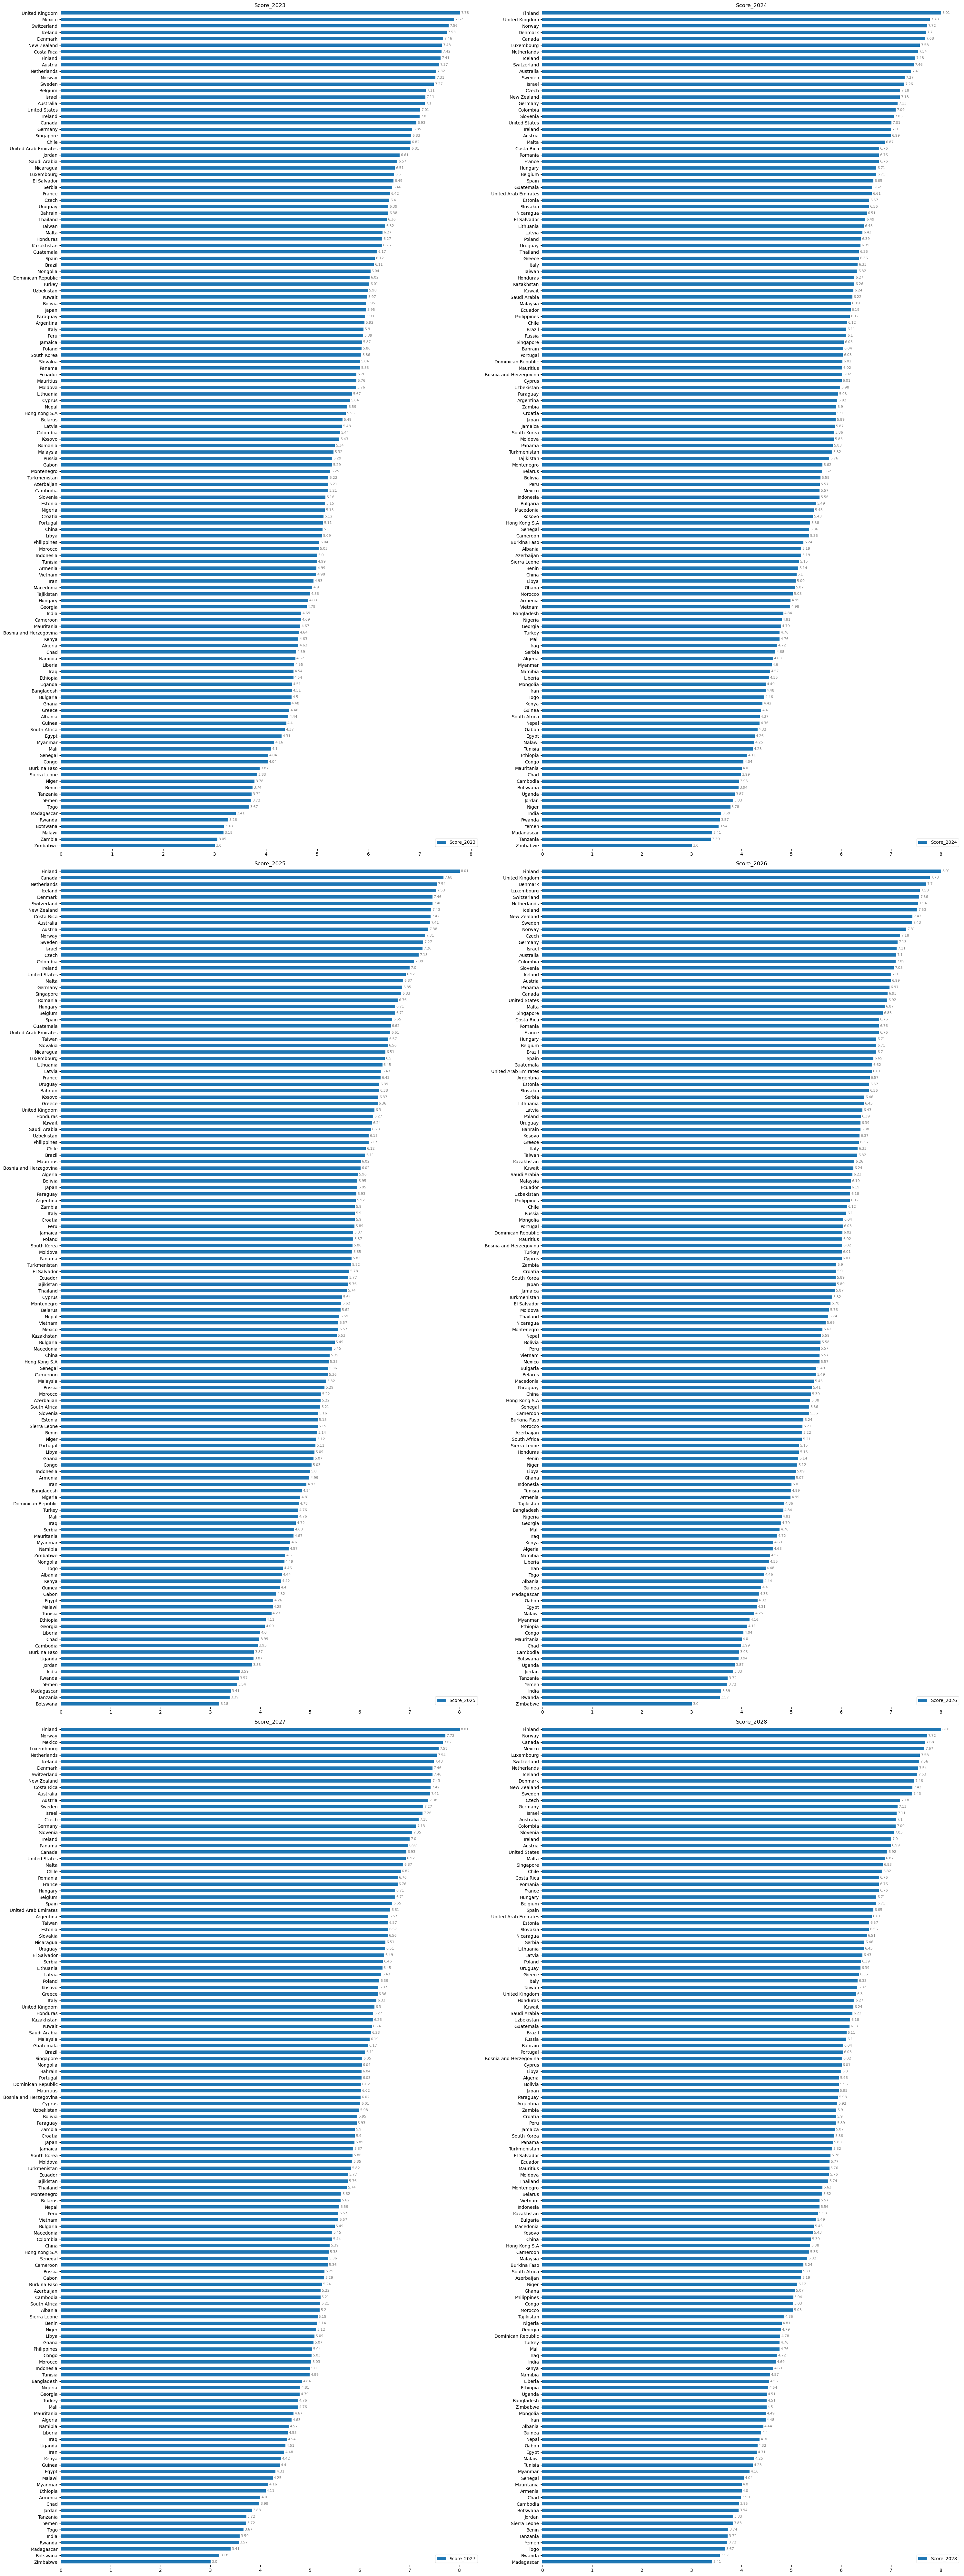

In [424]:
## Creating a inverted bar chart to visualize the results

all_scores_subset = all_scores[['unique countries'] + [col for col in all_scores.columns if str(col).startswith('Score_')]]
all_scores_23_28 = all_scores_subset.iloc[:, list(range(1)) + list(range(-6, 0))]

columns = all_scores_23_28.columns[1:]  
rows = 3
cols = 2

fig, ax_arr = plt.subplots(rows, cols, squeeze=False, figsize = (30, 80))
row_n = 0

for x, col in enumerate(columns):
    col_n = x % cols
    if col_n == 0 and x != 0:
        row_n += 1  
    all_scores_23_28.sort_values(by=col, ascending=True).plot(kind='barh', y = col, x ='unique countries', ax=ax_arr[row_n, col_n], title=col)
    
    for bar in ax_arr[row_n, col_n].patches:
        ax_arr[row_n, col_n].text(bar.get_width() + 0.02,  
                                  bar.get_y() + bar.get_height()/2, 
                                  round(bar.get_width(), 2),  
                                  va='center', ha='left', fontsize=8, color='grey')
    
    for spine in ax_arr[row_n, col_n].spines.values():
        spine.set_visible(False)
        
    ax_arr[row_n, col_n].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
all_scores_23_28.to_excel("PV_scores.xlsx")

In [407]:
all_scores_23_28.to_csv('PV_scores.csv', index=False)

In [425]:
all_scores_sorted = all_scores.sort_values(by='Score_2023', ascending=False).head(20)
all_scores_sorted

,unique countries,Score_2015,Rank_2015,Score_2016,Rank_2016,Score_2017,Rank_2017,Score_2018,Rank_2018,Score_2019,Rank_2019,Score_2020,Rank_2020,Score_2021,Rank_2021,Score_2022,Rank_2022,Score_2023,Rank_2023,Score_2024,Rank_2024,Score_2025,Rank_2025,Score_2026,Rank_2026,Score_2027,Rank_2027,Score_2028,Rank_2028
20,United Kingdom,6.867,21,6.725,22,6.714,19,7.190,11,7.054,15,7.1645,13,7.064,17,6.943,17,7.780678,1,7.780920,2,6.295737,38,7.781405,2,6.296130,44,6.296326,42
13,Mexico,7.187,14,6.778,20,6.578,25,6.488,24,6.595,23,6.4650,24,6.317,36,6.128,45,7.667977,2,5.566311,75,5.566410,72,5.566508,77,7.668518,3,7.668653,4
0,Switzerland,7.587,1,7.509,2,7.494,4,7.487,5,7.480,6,7.5599,3,7.571,3,7.512,4,7.563526,3,7.458088,9,7.458168,6,7.563771,5,7.458329,8,7.563934,6
1,Iceland,7.561,2,7.501,3,7.504,3,7.495,4,7.494,4,7.5045,4,7.554,4,7.557,3,7.526863,4,7.482004,8,7.527064,4,7.527164,7,7.482303,6,7.527364,8
2,Denmark,7.527,3,7.526,1,7.522,2,7.555,3,7.600,2,7.6456,2,7.620,2,7.636,2,7.458246,5,7.698898,4,7.458399,5,7.699056,3,7.458552,7,7.458629,9
8,New Zealand,7.286,9,7.334,8,7.314,8,7.324,8,7.307,8,7.2996,8,7.277,9,7.200,10,7.429693,6,7.179318,14,7.429874,7,7.429964,8,7.430054,9,7.430144,10
11,Costa Rica,7.226,12,7.087,14,7.079,12,7.072,13,7.167,12,7.1214,15,7.069,16,6.582,23,7.421483,7,6.760133,22,7.421613,8,6.760252,24,7.421743,10,6.760370,24
5,Finland,7.406,6,7.413,5,7.469,5,7.632,1,7.769,1,7.8087,1,7.842,1,7.821,1,7.406511,8,8.006314,1,8.006366,1,8.006418,1,8.006470,1,8.006522,1
12,Austria,7.200,13,7.119,12,7.006,13,7.139,12,7.246,10,7.2942,9,7.268,10,7.163,11,7.374841,9,6.993580,20,7.375089,10,6.993815,18,7.375336,12,6.994049,19
6,Netherlands,7.378,7,7.339,7,7.377,6,7.441,6,7.488,5,7.4489,6,7.464,5,7.415,5,7.317568,10,7.540286,7,7.540349,3,7.540411,6,7.540474,5,7.540536,7
